https://velog.io/@mare-solis/LDA-%ED%86%A0%ED%94%BD-%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%9C%BC%EB%A1%9C-%EC%BD%98%ED%85%90%EC%B8%A0-%EB%A6%AC%EB%B7%B0%EB%A5%BC-%EB%B6%84%EC%84%9D%ED%95%98%EC%9E%90

https://bab2min.tistory.com/633

In [ ]:
!pip install --upgrade tomotopy

     |████████████████████████████████| 16.3 MB 7.3 MB/s 


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 4.9 MB/s 


In [ ]:
import konlpy

In [ ]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tomotopy as tp

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/크롤링데이터/본문추가.csv")
df

,발행일,언론사,기사URL,제목,본문
0,2022-01-02,매일경제,https://news.naver.com/main/read.naver?mode=LS...,"장애인 한달째 지하철 시위…""출근길 불편"" vs ""응원한다""",전동휠체어 탄 전장연 회원들오전 8시에 고의 승하차 반복장애인권리보장법 등 4개법안...
1,2022-01-03,YTN,https://news.naver.com/main/read.naver?mode=LS...,"매주 벌어지는 '장애인 지하철 시위'...""이해한다"" vs ""시민 볼모""",동영상 뉴스[앵커]최근 서울에선 장애인 단체가 이동권 증진을 요구하며 출근길 지하철...
2,2022-01-03,뉴스1,https://news.naver.com/main/read.naver?mode=LS...,"장애인단체 ""권리 보장""…5호선 시위부터 결의대회까지(종합)","'교통약자법' 예산 임의조항 통과 비판…광화문역→여의도역 이동장애인 권리 보장, 탈..."
3,2022-01-03,파이낸셜뉴스,https://news.naver.com/main/read.naver?mode=LS...,"""예산지원 없는 교통약자법은 무용지물""","장애인단체, 이동권 보장 호소전국장애인차별철폐연대 회원들이 3일 서울 종로구 광화문..."
4,2022-01-03,한겨레,https://news.naver.com/main/read.naver?mode=LS...,[만리재사진첩] “당신들과 똑!같!이! 지하철 타고 집에 가고 싶다”,전국장애인차별철폐연대 ‘지하철 직접 타기 행동’ 현장한 전국장애인차별철폐연대 활동가...
...,...,...,...,...,...
1566,2022-03-31,국민일보,https://news.naver.com/main/read.naver?mode=LS...,"박주선 “박근혜, 최고 예우로 취임식 초청… 전장연도 고려”",문재인 대통령과 윤석열 대통령 당선인이 지난 28일 오후 만찬 회동을 위해 청와대 ...
1567,2022-03-31,세계일보,https://news.naver.com/main/read.naver?mode=LS...,“수권정당 대표가 장애인과 비장애인 분열시켜”…기독교교회협도 이준석 비판,이준석 국민의힘 대표와 윤호중 더불어민주당 공동비상대책위원장이 30일 서울 종로구 ...
1568,2022-03-31,헤럴드경제,https://news.naver.com/main/read.naver?mode=LS...,전장연 “‘이준석 군’ 아닌 당 대표지 않나…악의적 편집” 저격,“객관적 사실도 의도적 편집된 이야기로 주장”“21년을 외쳤다…서울시가 책임 지지 ...
1569,2022-03-31,한겨레,https://news.naver.com/main/read.naver?mode=LS...,"오늘도 삭발…“이준석 대표, 일주일 동안 휠체어 함께 타보자”",“출근길 불편 사과드려…가고 싶은 곳 가는 평범한 삶을 원할뿐”이준석 대표에게 거듭...


In [ ]:
df.isnull().sum()

발행일      0
언론사      0
기사URL    0
제목       0
본문       0
dtype: int64

In [ ]:
#데이터 프레임의 'text' 열의 값들을 str 형식으로 바꾸기
df['본문'] = df['본문'].astype(str) 

In [ ]:
#한글이 아니면 빈 문자열로 바꾸기
df['본문'] = df['본문'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

In [ ]:
df.isnull().sum()

발행일      0
언론사      0
기사URL    0
제목       0
본문       0
dtype: int64

In [ ]:
import re

In [ ]:
def clean_text(text): 
  text = text.replace(".", " ").strip() 
  text = text.replace("·", " ").strip() 
  pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
  text = re.sub(pattern=pattern, repl='', string=text) 
  return text

In [ ]:
from konlpy.tag import Mecab 
from tqdm import tqdm

In [ ]:
Data_list = []
for i in range(len(df)):
  Data_list.append(clean_text(df['본문'][i]))

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt() # 객체 생성

In [ ]:
len(Data_list)

1571

In [ ]:
for i, document in enumerate(Data_list):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] in ['Noun']: #명사
            clean_words.append(word[0])
    #print(clean_words) #['스토리', '진짜', '노잼']
    Data_list[i] = clean_words

In [ ]:
len(Data_list)

In [ ]:
for i in range(len(Data_list)):
  Data_list[i] = [e for e in Data_list[i] if len(e) >= 2] #1글자 단어들은 제거하기


In [ ]:
x=[]
y=[]

for k in range(1, 30):
    model = tp.LDAModel(k=k, alpha=0.1, eta=0.01, min_cf=2, tw=tp.TermWeight.IDF)
    
    for line in Data_list:
        model.add_doc(line)
        
    for i in range(100):
        model.train(1)
        
    coh = tp.coherence.Coherence(model, coherence='c_v')
    coherence = coh.get_score()

    x.append(k)
    y.append(coherence)
    
    #for i in range(model.k):
    #   res = model.get_topic_words(i, top_n=5)
    #   print('Topic #{}'.format(i), end='\t')
    #   print(', '.join(w for w, p in res))

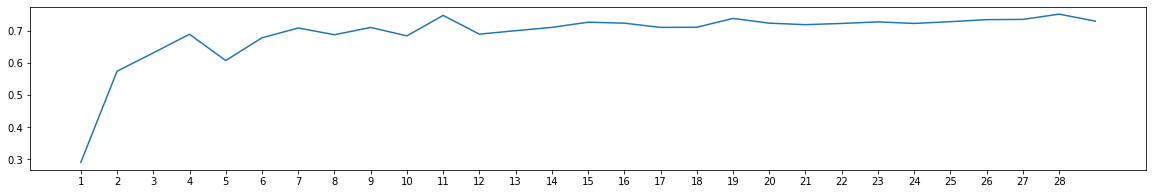

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(x, y)
plt.xticks(np.arange(1, 29))
plt.show()

In [ ]:
for i in range(len(x)):
  print(x[i],y[i])

1 0.2902684289962053
2 0.5737882524728775
3 0.6309345990419387
4 0.6889175321441144
5 0.6072465592622758
6 0.6779416975254814
7 0.708401358127594
8 0.6875165980309249
9 0.7101159128877852
10 0.6839311931282281
11 0.7476212846284563
12 0.6892568199584882
13 0.7001071319557154
14 0.710307204723358
15 0.7264431653420131
16 0.7234595906920732
17 0.7102645534802886
18 0.710754613743888
19 0.7381965928956084
20 0.7234755136072635
21 0.718771083723931
22 0.7226219717074525
23 0.7273860218084376
24 0.7226293241605162
25 0.7280960597991942
26 0.7344322965695308
27 0.7351087582608063
28 0.7515673266989843
29 0.72977265838919


일관성은 주제 내에서 단어 사이의 상대적 거리를 측정합니다. C_V에는 일반적으로 0 < x < 1 및 uMass -14 < x < 14의 두 가지 주요 유형이 있습니다. 측정되는 단어가 동일한 단어 또는 빅그램이 아닌 한 1 또는 +.9의 일관성을 보는 것은 드뭅니다. United States와 마찬가지로 United States는 ~.94의 일관성 점수를 반환하거나 Hero와 Hero는 1의 일관성을 반환할 것입니다. 주제의 전체 일관성 점수는 단어 사이의 거리의 평균입니다. 나는 c_v를 사용하고 있다면 내 LDA에서 .7을 얻으려고 노력합니다. 그것이 강력한 주제 상관 관계라고 생각합니다. 

.3 나쁘다

.4 낮다

.55 괜찮습니다

.65는 얻을 수 있는 만큼 좋을 수 있습니다.

.7 좋네요

.8 가능성이 낮고

.9는 아마도 틀릴 것이다

In [ ]:
model = tp.LDAModel(k=7, alpha=0.1, eta=0.01, min_cf=5)
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 7개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.

In [ ]:
for line in Data_list:
  model.add_doc(line)
  if i % 10 == 0: print('Document #{} has been loaded'.format(i))

In [ ]:
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)

Total docs: 1571
Total words: 392395
Vocab size: 4560


In [ ]:
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(1)

Iteration 0	LL per word: -9.008806371676084
Iteration 1	LL per word: -8.810800364040302
Iteration 2	LL per word: -8.657142390806735
Iteration 3	LL per word: -8.524809701029946
Iteration 4	LL per word: -8.389826155465018
Iteration 5	LL per word: -8.228901188671198
Iteration 6	LL per word: -8.028018789583697
Iteration 7	LL per word: -7.793068921092538
Iteration 8	LL per word: -7.585468585119117
Iteration 9	LL per word: -7.439539891136359
Iteration 10	LL per word: -7.335401176316128
Iteration 11	LL per word: -7.277671770075884
Iteration 12	LL per word: -7.232009802774017
Iteration 13	LL per word: -7.199240650928832
Iteration 14	LL per word: -7.169823884094212
Iteration 15	LL per word: -7.146370175342652
Iteration 16	LL per word: -7.126101646802147
Iteration 17	LL per word: -7.10866145357298
Iteration 18	LL per word: -7.094676980995501
Iteration 19	LL per word: -7.081631238185086
Iteration 20	LL per word: -7.067620823358314
Iteration 21	LL per word: -7.058904717411977
Iteration 22	LL per w

In [ ]:
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	공사, 장애인, 교통, 시민, 시위, 사회, 문건, 언론, 단체, 약자
Topic #1	장애인, 교통, 엘리베이터, 휠체어, 동권, 저상버스, 설치, 이동, 지하철, 이용
Topic #2	대표, 시위, 장애인, 장연, 의원, 국민, 이준석, 지하철, 비판, 동권
Topic #3	후보, 대선, 심상정, 정의당, 이재명, 윤석열, 토론, 민주당, 국민, 안철수
Topic #4	장애인, 시위, 지하철, 장연, 호선, 서울, 예산, 동권, 보장, 권리
Topic #5	장애인, 인수위, 대표, 장연, 요구, 지하철, 시위, 권리, 출근길, 사과
Topic #6	생각, 대통령, 지금, 당선인, 얘기, 문제, 대해, 국민, 부분, 이야기


In [ ]:
from pandas import Series, DataFrame

In [ ]:
# add_doc ...
doc_inst = model.make_doc(['대표','시위'])
topic_dist, ll = model.infer(doc_inst)

print("Topic Distribution for Unseen Docs: ", topic_dist.tolist().index(sorted(topic_dist)[-1]))

Topic Distribution for Unseen Docs:  2


In [ ]:
# pyLDAvis에 입력하여 시각화하기
topic_term_dists = np.stack([model.get_topic_word_dist(k) for k in range(model.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in model.docs])
doc_lengths = np.array([len(doc.words) for doc in model.docs])
vocab = list(model.used_vocabs)
term_frequency = model.used_vocab_freq

In [ ]:
len(topic_term_dists)

7

In [ ]:
len(doc_topic_dists)

1571

In [ ]:
len(doc_lengths)

1571

In [ ]:
len(vocab)

4560

In [ ]:
len(term_frequency)

4560

In [ ]:
import os 
os.environ["PYTHONIOENCODING"] ="utf-8"

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
pyLDAvis.save_html(prepared_data, '/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/0_텀프로젝트 코드/LDA/ldavis.html')

In [ ]:
pyLDAvis.display(prepared_data)